---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [30]:
def answer_one():
    
    fraud = pd.read_csv('fraud_data.csv', usecols=['Class'])
    
    return fraud.mean()['Class']


In [31]:
f"Proportion of fraudulent transactions: {answer_one():.3f}."

'Proportion of fraudulent transactions: 0.016.'

In [32]:
# Use X_train, X_test, y_train, y_test for all of the following questions

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1] # features
y = df.iloc[:,-1] # target

# 75:25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, df.shape

((16269, 29), (5424, 29), (16269,), (5424,), (21693, 30))

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [33]:
def answer_two():

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_preds = dummy_majority.predict(X_test)

    return (accuracy_score(y_test, y_dummy_preds), recall_score(y_test, y_dummy_preds))

In [34]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [35]:
def answer_three():

    svc_model = SVC(kernel = 'rbf', gamma = 'scale').fit(X_train, y_train)
    y_test_preds = svc_model.predict(X_test)
    # precision: precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    # recall: recall is intuitively the ability of the classifier to find all the positive samples.
    return (accuracy_score(y_test, y_test_preds),
                recall_score(y_test, y_test_preds),
                    precision_score(y_test, y_test_preds))

In [36]:
answer_three()

(0.9942846607669616, 0.6375, 0.9622641509433962)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [37]:
def answer_four():

    svc_model = SVC(kernel = 'rbf', C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    y_scores = svc_model.decision_function(X_test)
    y_preds = y_scores > -220
    return confusion_matrix(y_test, y_preds)

In [38]:
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [39]:
def answer_five():
        
    lrmodel = LogisticRegression(solver = 'lbfgs', max_iter = 10000).fit(X_train, y_train)
    y_scores = lrmodel.decision_function(X_test)
    y_preds = lrmodel.predict_proba(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    precision_val = 0.75
    recall_val = recall[np.where(precision == precision_val)]
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.tight_layout()
    
    ax1.plot(precision, recall, '-')
    ax1.set(title = 'Precision-Recall Curve', ylabel = 'Recall', xlabel = 'Precision')
    ax1.grid()
    ax1.set_axisbelow(True)
    ax1.grid(linestyle='-', linewidth='0.5', color='red')
    ax1.minorticks_on()
    ax1.grid(which='major', linestyle='-', linewidth='0.3', color='red')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    fpr, tpr, roc_thres = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    fpr_val = 0.16
    tpr_val = tpr[np.where(fpr == fpr_val)]
    
    ax2.plot(fpr, tpr, '-')
    ax2.set(title = 'ROC curve', ylabel = 'True Positive Rate', xlabel = 'False Positive Rate')
    ax2.grid()
    ax2.set_axisbelow(True)
    ax2.grid(linestyle='-', linewidth='0.5', color='red')
    ax2.minorticks_on()
    ax2.grid(which='major', linestyle='-', linewidth='0.3', color='red')
    ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
   
    return

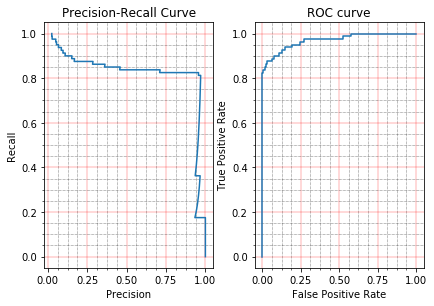

In [40]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [41]:
def answer_six():    
    #from sklearn.linear_model import LogisticRegression

    parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    
    lr = LogisticRegression(solver = 'liblinear', max_iter = 10000)
    clf_lr = GridSearchCV(lr, param_grid = parameters, cv = 3, scoring = 'recall')
    clf_lr.fit(X_train, y_train)
    
    cv_result = clf_lr.cv_results_
    mean_test_score = cv_result['mean_test_score']
    result = np.array(mean_test_score).reshape(5, 2)
    
    return result

In [42]:
scores = answer_six()

In [43]:
scores

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

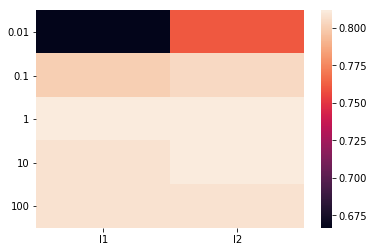

In [44]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(scores)